In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('grades.csv')
data.shape

(198, 2)

#### Q1) What percentage of students submitted their solutions in .zip format?

In [3]:
data['file_format'] = data['submission'].apply(lambda x: x.split('.')[-1])

In [4]:
(len(data[data['file_format'] == 'zip']) / len(data)) * 100

95.45454545454545

#### Q2) How many students submitted the assignment after the first deadline (including the students who submitted after the second deadline) ?

In [5]:
data['day'] = pd.DatetimeIndex(data['submit_time']).day
data['month'] = pd.DatetimeIndex(data['submit_time']).month
data['year'] = pd.DatetimeIndex(data['submit_time']).year
data['hour'] = pd.DatetimeIndex(data['submit_time']).hour
data['minute'] = pd.DatetimeIndex(data['submit_time']).minute
data['second'] = pd.DatetimeIndex(data['submit_time']).second

In [6]:
len(data[pd.to_datetime(data['submit_time']) > pd.to_datetime('01/03/17-23:59:59')])

C:\Users\vimishra\AppData\Local\Temp\ipykernel_1976\624326165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  len(data[pd.to_datetime(data['submit_time']) > pd.to_datetime('01/03/17-23:59:59')])


44

#### Q3) On which date did the most students submit the assignment?

In [7]:
data['date'] = pd.DatetimeIndex(data['submit_time']).date

In [8]:
data.groupby(by = 'date')['submission'].count()

date
2016-11-19      1
2016-12-19      1
2016-12-21      1
2016-12-28      2
2016-12-29      2
2016-12-30      6
2016-12-31      1
2017-01-01      6
2017-01-02     14
2017-01-03    120
2017-01-04     12
2017-01-06      1
2017-01-07      2
2017-01-08      3
2017-01-09     21
2017-01-10      3
2017-01-17      1
2017-02-03      1
Name: submission, dtype: int64

#### Q4) In which hour of the day did most students submit the solution?

In [9]:
data.groupby(by = 'hour')['submission'].count()

hour
0     10
1      8
2      2
3      3
4      2
6      1
8      1
9      1
10     3
11     1
12     3
13     6
14     6
15     4
16     2
17     4
18     6
19     2
20    16
21    27
22    24
23    66
Name: submission, dtype: int64

#### Q5) If you plot the distribution of submissions by the hour, what can you observe?

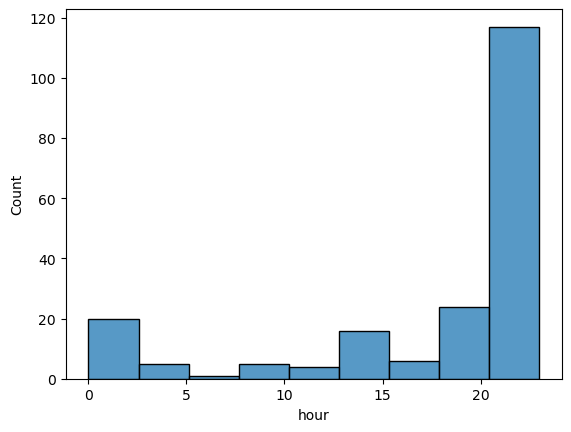

In [10]:
sns.histplot(data['hour'])
plt.show()